In [1]:
import numpy as np
generate_random = np.random.RandomState(667) #667 random valido per tutti
x = 10 * generate_random.rand(100) #creiamo un valore di x random moltiplicato per 10

noise = np.random.normal(0,1,100) #random da 0 a 100 con media 0 e dev std 1
y = noise + 3*x



(0.0, 10.0, 0.0, 30.0)

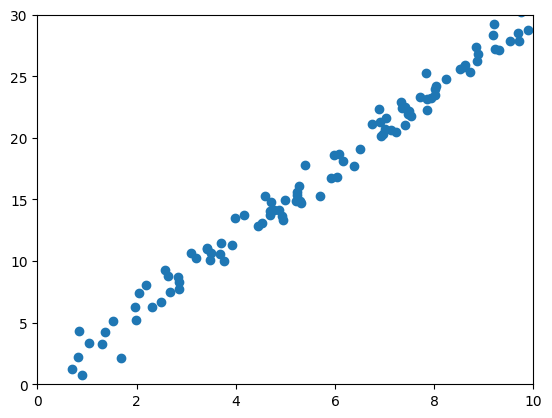

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x,y) #grafico con punti
plt.axis([0,10,0,30]) #definisco valore assi

In [3]:
X=x.reshape(-1,1) #creo il modello a 2 variabili, perchè era a 1 var 

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() #creo un modello con regressione lineare

In [5]:
model #creato ma senza valori

LinearRegression()

In [6]:
model.fit(X,y) #creato con miei valori definiti prima

LinearRegression()

In [7]:
model.intercept_ #valore dell'intercetta, ossia di y se x=0

0.005202385098996842

In [8]:
model.coef_# valore del coeff.angolare (definito prima=3)

array([2.98085586])

In [9]:
y_pred=model.predict(X) #creo un modello predittivo di y (ossia i punti della retta interpolante)

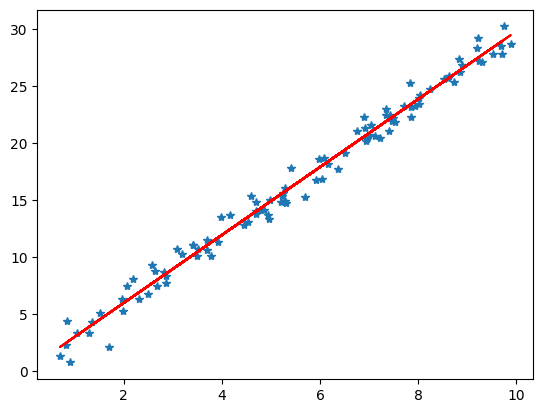

In [10]:
plt.plot(X,y,'*') #definisco i punti della distribuzione (blu) 
plt.plot(X,y_pred,'-r') #definisco i punti della retta interpolante, con X grande, Y predittivo e con colore rosso, - sta per retta

In [11]:
#ora applico il modello su dati di test e train e li confornto. I dati di test sono dati che non ha mai
# visto
from sklearn.model_selection import train_test_split

In [12]:
# definisco le variabili, già definite nell'esercizio precedente, chiedendo di usare il 20% dei dati totali
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )
'''La linea di codice separa i dati in due insiemi distinti: uno per il training (X_train e y_train) 
e uno per il testing (X_test e y_test). Il dataset originale è composto da due array: 
X (contenente le features) e y (contenente la variabile target). 
La funzione train_test_split della libreria scikit-learn viene utilizzata per suddividere questi due
 array in modo casuale, utilizzando il 20% dei dati per il test 
 (impostato con il parametro test_size=0.2) e il 80% per il training. 
 Il parametro random_state=667 serve invece per impostare un seed per la generazione dei numeri casuali,
   in modo da permettere la ripetizione della suddivisione del dataset in futuro.'''

'La linea di codice separa i dati in due insiemi distinti: uno per il training (X_train e y_train) \ne uno per il testing (X_test e y_test). Il dataset originale è composto da due array: \nX (contenente le features) e y (contenente la variabile target). \nLa funzione train_test_split della libreria scikit-learn viene utilizzata per suddividere questi due\n array in modo casuale, utilizzando il 20% dei dati per il test \n (impostato con il parametro test_size=0.2) e il 80% per il training. \n Il parametro random_state=667 serve invece per impostare un seed per la generazione dei numeri casuali,\n   in modo da permettere la ripetizione della suddivisione del dataset in futuro.'

In [13]:
X_train.shape, X_test.shape #restituisce il formato, 80% dati per train, 20% per test

((80, 1), (20, 1))

In [14]:
model.fit(X_train,y_train) #il modello viene creato usando i dati di train, l'80% dei dati reali
'''model.fit(X_train,y_train) è un metodo in cui X_train rappresenta l'input di addestramento (features)
 e y_train rappresenta la variabile di output (target). Esso utilizza l'algoritmo del modello per 
 addestrare il modello con i dati di addestramento forniti e fornire un modello addestrato in grado di
  fare previsioni accettabili sui dati di prova. In sostanza, model.fit (X_train, y_train) 
  serve ad addestrare il modello sui dati di addestramento per fare previsioni su nuovi dati non visti.'''

"model.fit(X_train,y_train) è un metodo in cui X_train rappresenta l'input di addestramento (features)\n e y_train rappresenta la variabile di output (target). Esso utilizza l'algoritmo del modello per \n addestrare il modello con i dati di addestramento forniti e fornire un modello addestrato in grado di\n  fare previsioni accettabili sui dati di prova. In sostanza, model.fit (X_train, y_train) \n  serve ad addestrare il modello sui dati di addestramento per fare previsioni su nuovi dati non visti."

In [15]:
y_pred=model.predict(X_test) #predici i valori con il modello usando 20% dei dati, mai visti nell'allenamento
'''y_pred è la variabile che contiene le previsioni del modello per il set di dati di test(X_test).
 La funzione model.predict() viene utilizzata per generare le previsioni del modello.'''

'y_pred è la variabile che contiene le previsioni del modello per il set di dati di test(X_test).\n La funzione model.predict() viene utilizzata per generare le previsioni del modello.'

In [16]:
import pandas as pd
pd.DataFrame(list(zip(y_pred,y_test))) #cfr i dati predittivi basati sul 20% con i dati reali (sempre il 20%)
'''La funzione pd.DataFrame() produce un oggetto pandas DataFrame, che è una struttura dati tabulare in
cui le colonne possono avere tipi di dati diversi. La funzione prende come input una lista (zip) di tuple (y_pred, y_test) e crea un DataFrame con due colonne: la prima contenente i valori predetti (y_pred) e la seconda contenente i valori reali (y_test).'''

'La funzione pd.DataFrame() produce un oggetto pandas DataFrame, che è una struttura dati tabulare in\ncui le colonne possono avere tipi di dati diversi. La funzione prende come input una lista (zip) di tuple (y_pred, y_test) e crea un DataFrame con due colonne: la prima contenente i valori predetti (y_pred) e la seconda contenente i valori reali (y_test).'

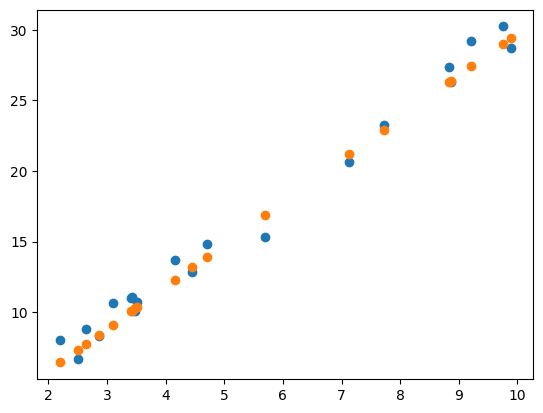

In [17]:
plt.plot(X_test,y_test,'o')#stampa il grafico, facoltativo
plt.plot(X_test, y_pred,'o')

In [18]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,13.162476,12.834705
1,9.120196,10.673878
2,26.291841,27.388042
3,10.070900,11.011173
4,10.087865,11.070430
5,22.934569,23.290928
6,10.281654,10.060610
7,16.897388,15.305465
8,6.433184,8.031933
9,7.351903,6.704885


In [19]:
res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,13.162476,12.834705,-0.327771
1,9.120196,10.673878,1.553681
2,26.291841,27.388042,1.096201
3,10.070900,11.011173,0.940272
4,10.087865,11.070430,0.982565
5,22.934569,23.290928,0.356359
6,10.281654,10.060610,-0.221044
7,16.897388,15.305465,-1.591923
8,6.433184,8.031933,1.598749
9,7.351903,6.704885,-0.647018


In [20]:
y_test.shape

(20,)

In [21]:
y_pred.shape

(20,)

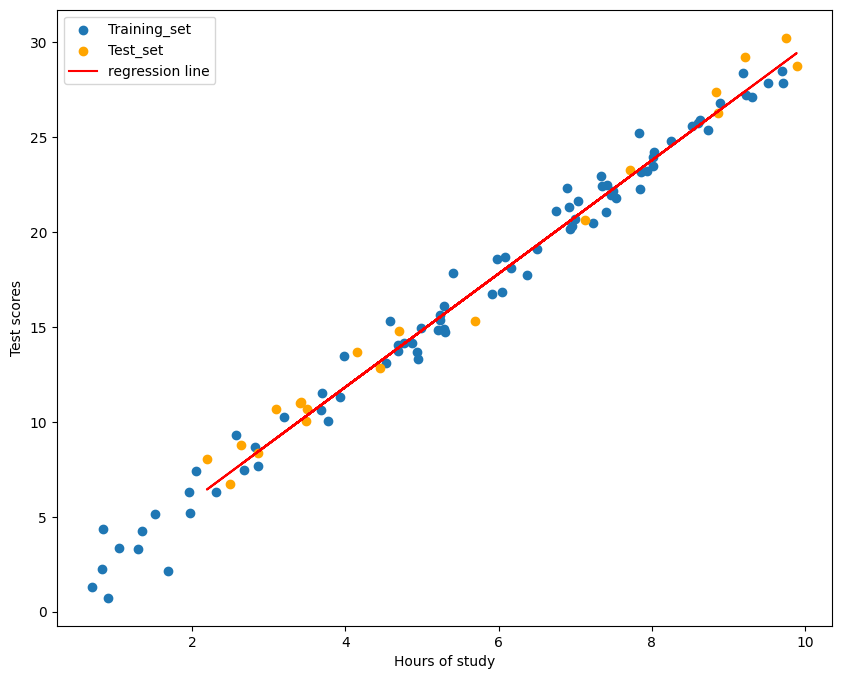

In [22]:
plt.figure(figsize = (10, 8))

plt.scatter(X_train, y_train,label='Training_set')
plt.scatter(X_test, y_test,color='orange',label='Test_set')
plt.plot(X_test, y_pred,color='red',label='regression line')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.legend();